# 이미지 파일에서 ball, strike, out 클래스를 분류해주는 모델
- name : 이민주
- project : 오늘은 해설왕
- stack : Yolov5, opencv(4.8.0), python(3.10.12)
- 최종 수정 : 7/15/2024

## 데이터셋 준비

ball, strike, ball 수에 해당하는 캡쳐 이미지 895 장 이용

- 36개의 클래스
- 640*640 resize

- augmentation (ssaturation, blur, noise) 를 적용해서 총 2303 장의 이미지 사용

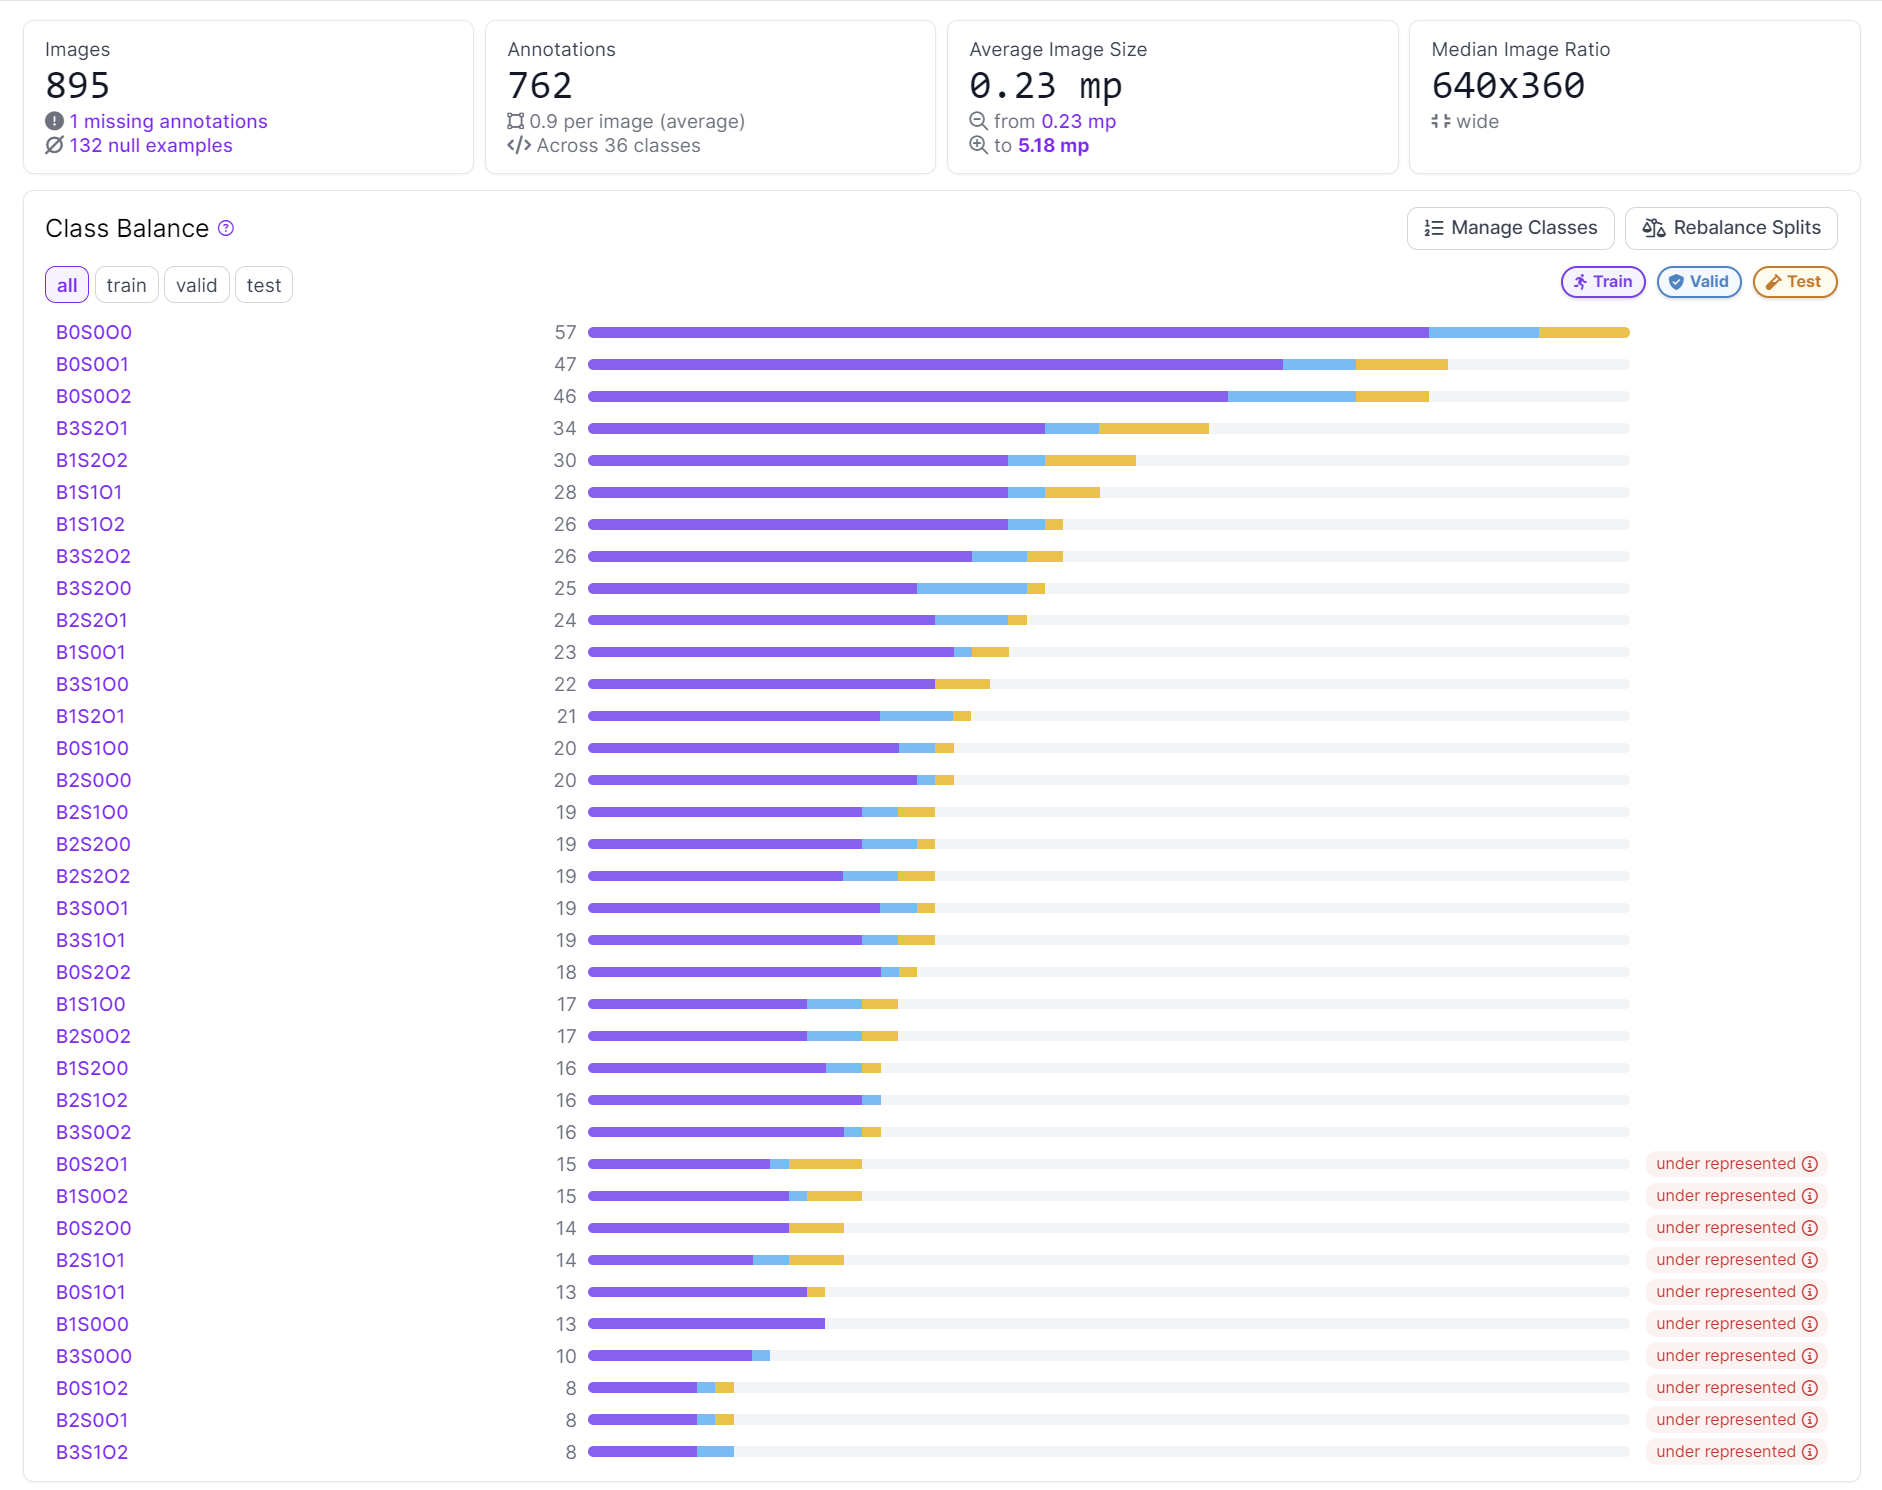


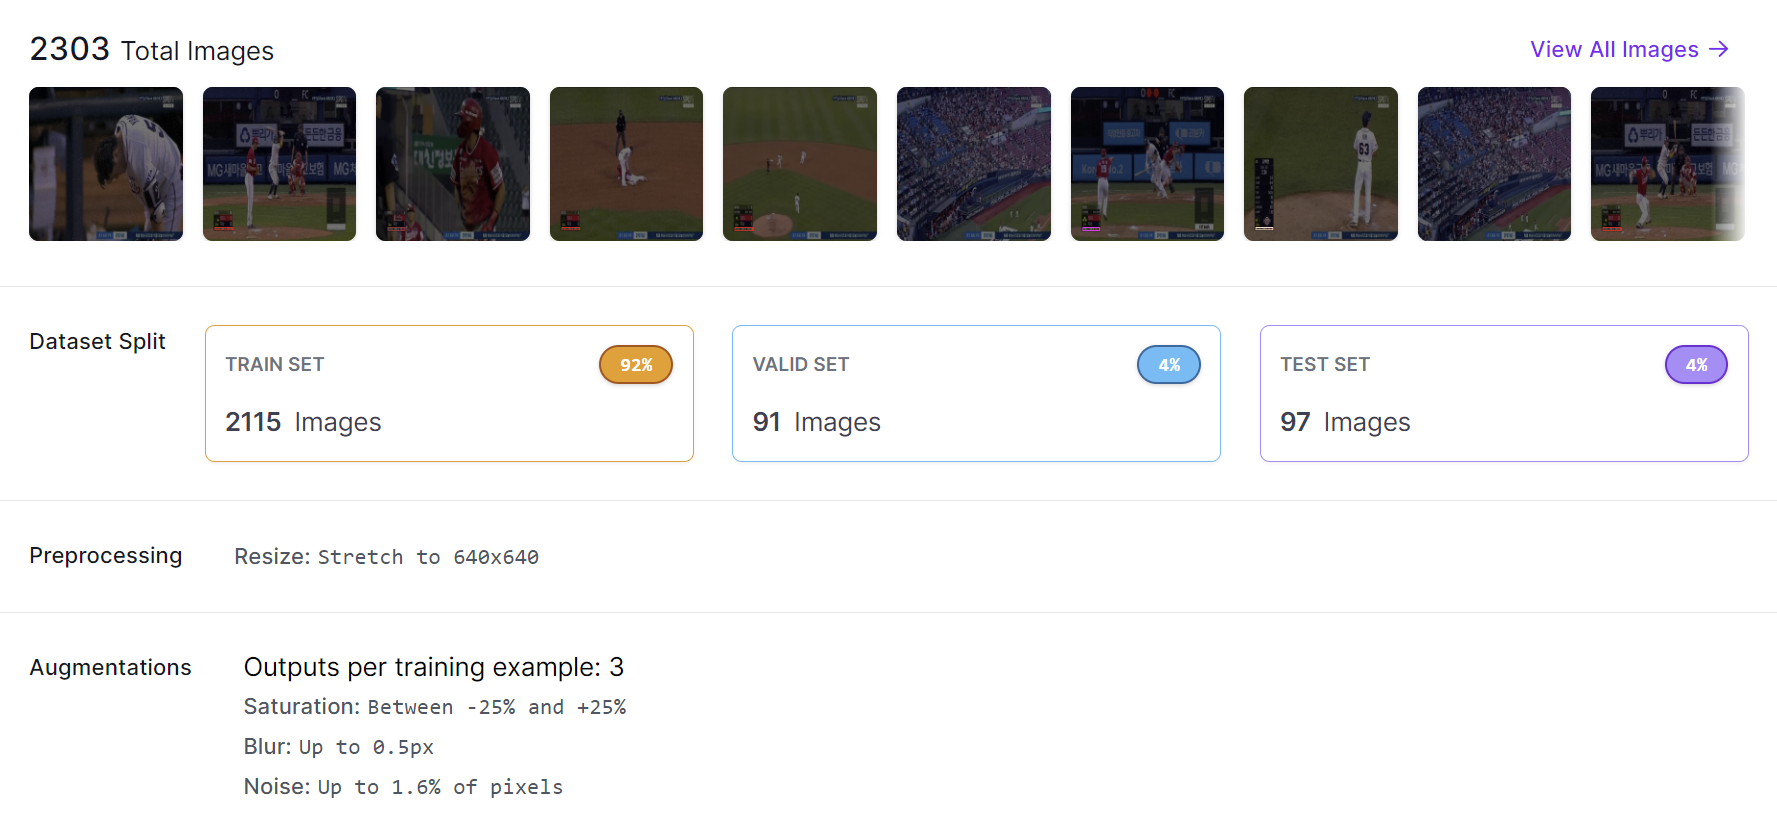

## 데이터셋 다운로드

구글 드라이브 연동 & Roboflow key
-  Roboflow key : https://app.roboflow.com/ds/lGgJdWJxXF?key=JOhTBlmGua

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile
import requests

# Roboflow에서 제공한 URL 사용
dataset_url = "https://app.roboflow.com/ds/lGgJdWJxXF?key=JOhTBlmGua"

# 데이터셋 다운로드
r = requests.get(dataset_url)
with open('/content/drive/MyDrive/k111/dataset.zip', 'wb') as f:
    f.write(r.content)

# 압축 해제
with zipfile.ZipFile('/content/drive/MyDrive/k111/dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/k111/dataset')

# 데이터셋 구조 확인
os.listdir('/content/drive/MyDrive/k111/dataset')


['README.dataset.txt',
 'README.roboflow.txt',
 'data.yaml',
 'test',
 'train',
 'valid']

In [3]:
import os

# 데이터셋 디렉토리 구조 확인
dataset_dir = '/content/drive/MyDrive/k111/dataset/'
print(os.listdir(dataset_dir))

# train, val 디렉토리 구조 확인
print(os.listdir(os.path.join(dataset_dir, 'train')))
print(os.listdir(os.path.join(dataset_dir, 'valid')))


['README.dataset.txt', 'README.roboflow.txt', 'test', 'train', 'valid', 'data.yaml']
['images', 'labels', 'labels.cache']
['images', 'labels', 'labels.cache']


data.yaml 파일 내용 (절대 경로로 수정 후 다음 step 진행)

In [4]:
# data.yaml 파일 내용 확인
data_yaml_path = '/content/drive/MyDrive/k111/dataset/data.yaml'
with open(data_yaml_path, 'r') as file:
    data_yaml = file.read()
print(data_yaml)


train: /content/drive/MyDrive/k111/dataset/train/images
val: /content/drive/MyDrive/k111/dataset/valid/images
test: /content/drive/MyDrive/k111/dataset/test/images

nc: 36
names: ['B0S0O0', 'B0S0O1', 'B0S0O2', 'B0S1O0', 'B0S1O1', 'B0S1O2', 'B0S2O0', 'B0S2O1', 'B0S2O2', 'B1S0O0', 'B1S0O1', 'B1S0O2', 'B1S1O0', 'B1S1O1', 'B1S1O2', 'B1S2O0', 'B1S2O1', 'B1S2O2', 'B2S0O0', 'B2S0O1', 'B2S0O2', 'B2S1O0', 'B2S1O1', 'B2S1O2', 'B2S2O0', 'B2S2O1', 'B2S2O2', 'B3S0O0', 'B3S0O1', 'B3S0O2', 'B3S1O0', 'B3S1O1', 'B3S1O2', 'B3S2O0', 'B3S2O1', 'B3S2O2']

roboflow:
  workspace: detectionmodel-posdm
  project: detect-zxfhw
  version: 7
  license: CC BY 4.0
  url: https://universe.roboflow.com/detectionmodel-posdm/detect-zxfhw/dataset/7


## YOLOv5 클론 및 설치

In [3]:
# YOLOv5 저장소 클론 및 설치
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 16773, done.
remote: Counting objects: 100% (314/314), done.
remote: Compressing objects: 100% (231/231), done.
remote: Total 16773 (delta 171), reused 161 (delta 83), pack-reused 16459
Receiving objects: 100% (16773/16773), 15.47 MiB | 19.30 MiB/s, done.
Resolving deltas: 100% (11470/11470), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-p

In [5]:
pwd

'/content'

In [6]:
%cd yolov5

/content/yolov5


## 모델 학습
총 2번의 학습 진행

첫번째
- batch size : 32
- epoch :  100


두번째
- batch size : 16
- epoch : 50

In [ ]:

# 데이터셋 경로 설정
data_path = '/content/drive/MyDrive/k111/dataset/data.yaml'

# YOLOv5 모델 학습
!python train.py --img 640 --batch 32 --epochs 100 --data {data_path} --weights yolov5s.pt --project /content/drive/MyDrive/k111/ --name training_output



2024-07-12 01:15:35.128249: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-12 01:15:35.128314: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-12 01:15:35.252281: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/k111/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi

In [ ]:
data_path = '/content/drive/MyDrive/k111/dataset/data.yaml'

!python train.py --img 640 --batch 16 --epochs 50 --data {data_path} --weights /content/drive/MyDrive/k111/training_output/weights/best.pt --cache


2024-07-12 04:38:56.794324: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-12 04:38:56.794373: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-12 04:38:56.795652: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=/content/drive/MyDrive/k111/training_output/weights/best.pt, cfg=, data=/content/drive/MyDrive/k111/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=,

## 예측 수행


> !python detect.py --weights /content/drive/MyDrive/k111/best.pt(이 부분에 모델위치 집어넣고) --img 640 --conf 0.25(신뢰도 몇이상으로 할지) --source /content/drive/MyDrive/k111/dataset/test/images/-110-_png.rf.96a2c1ffb9046b1dffc534e0f19fa49b.jpg(어떤 파일을 테스트할지) 집어넣고 코드 돌리면 테스트 가능


In [8]:
!python detect.py --weights /content/drive/MyDrive/k111/best.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/k111/dataset/test/images/-110-_png.rf.96a2c1ffb9046b1dffc534e0f19fa49b.jpg


detect: weights=['/content/drive/MyDrive/k111/best.pt'], source=/content/drive/MyDrive/k111/dataset/test/images/-110-_png.rf.96a2c1ffb9046b1dffc534e0f19fa49b.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-340-g17c50046 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7107217 parameters, 0 gradients, 16.1 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/k111/dataset/test/images/-110-_png.rf.96a2c1ffb9046b1dffc534e0f19fa49b.jpg: 640x640 1 B3S1O0, 12.0ms
Speed: 0.9ms pre-process, 12.0ms inference, 633.2ms NMS per image at s

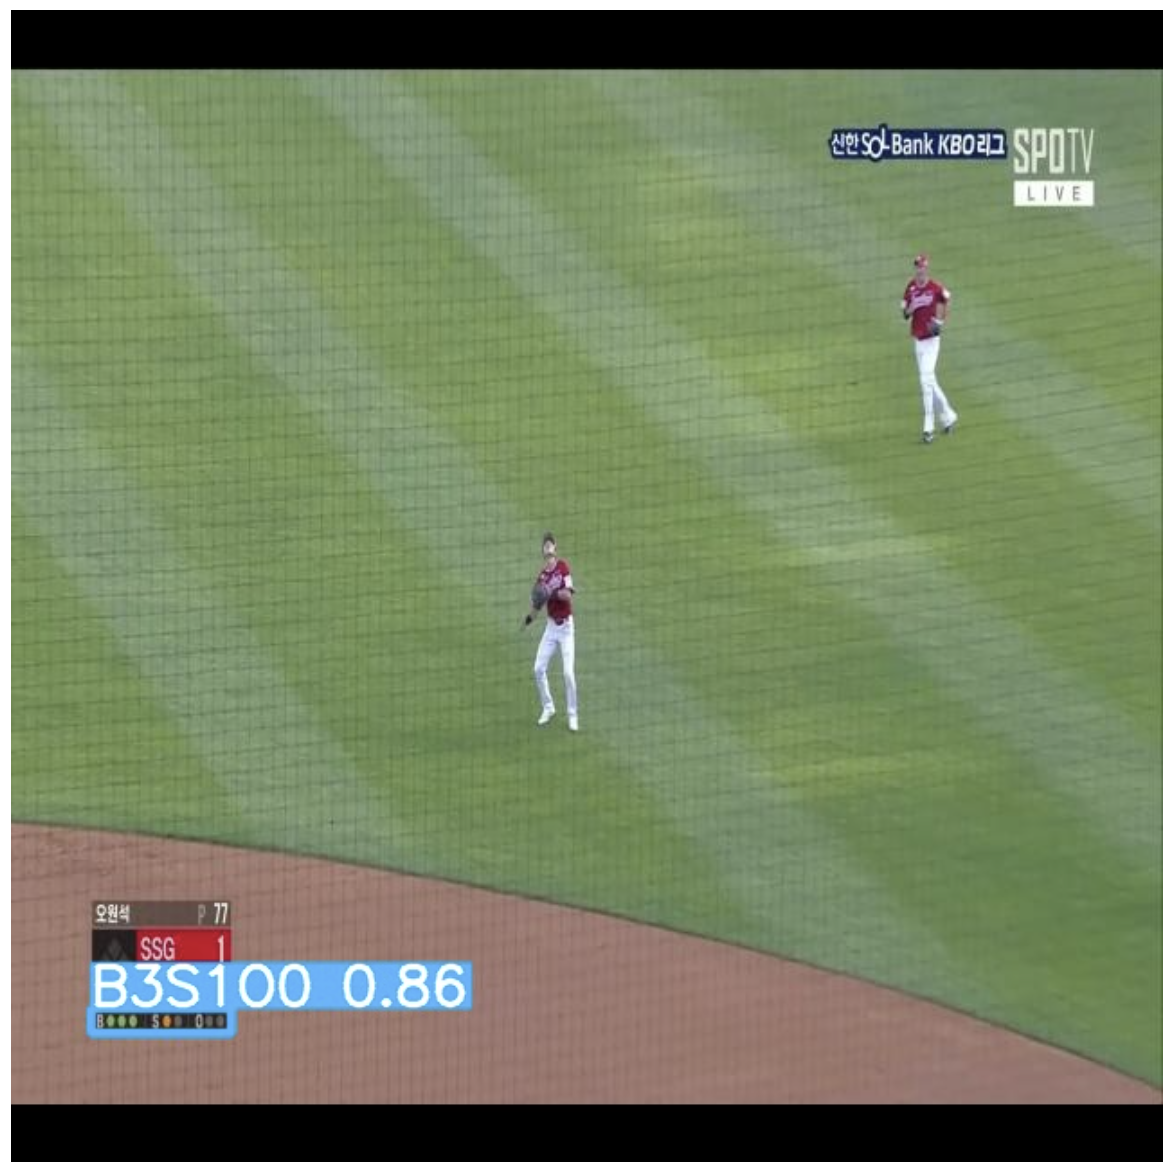

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/k111/dataset/valid/images/ --save-txt --save-conf --project /content/drive/MyDrive/k111/ --name detection_output


detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/k111/dataset/valid/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/drive/MyDrive/k111/, name=detection_output, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-339-g150a1a31 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7107217 parameters, 0 gradients, 16.1 GFLOPs
image 1/91 /content/drive/MyDrive/k111/dataset/valid/images/-10-_png.rf.4774dbd35b3ac16bedcb913bd1f34230.jpg: 640x640 1 B1S0O2, 11.8ms
image 2/91 /content/drive/MyDrive/k111/dataset/valid/images/-119-_png.rf.0b644e65b58f3e2789964c9904808876.jpg: 640x640 1 

> 몇 개의 클래스 빼고는 정확도가 잘 나옴을 알 수 있음

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.3 --source /content/drive/MyDrive/kkkk/newdata/ --save-txt --save-conf --project /content/drive/MyDrive/k111/ --name detection_output_newdata


detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/kkkk/newdata/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/drive/MyDrive/k111/, name=detection_output_newdata, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-339-g150a1a31 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7107217 parameters, 0 gradients, 16.1 GFLOPs
image 1/162 /content/drive/MyDrive/kkkk/newdata/스크린샷(10).png: 416x640 1 B1S0O2, 52.9ms
image 2/162 /content/drive/MyDrive/kkkk/newdata/스크린샷(100).png: 416x640 1 B3S0O0, 8.8ms
image 3/162 /content/drive/MyDrive/kkkk/newdata/스크린샷(101).png: 416x64

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/k111/dataset/test/images --save-txt --save-conf --project /content/drive/MyDrive/k111/ --name detection_output


detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/k111/dataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/drive/MyDrive/k111/, name=detection_output, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-339-g150a1a31 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7107217 parameters, 0 gradients, 16.1 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/97 /content/drive/MyDrive/k111/dataset/test/images/-106-_png.rf.bf5b698819de3019938150568a2ef903.jpg: 640x640 1 B3S1O0, 11.9ms
image 2/97 /content/drive/MyDrive/k111/dataset/test/images/-110-_png.rf.96a2c1ffb

## 비디오에 yolo 학습 모델 적용

비디오를 입력받고, 각 프레임 별로 학습된 모델을 적용한 결과값을 반환하도록 함

In [9]:
import cv2
import numpy as np
import torch

# YOLO 모델 로드
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/k111/best.pt')

# 비디오에서 프레임을 읽고 예측 결과를 파일로 저장하는 함수
def detect_frames_in_video(video_path, output_path):
    cap = cv2.VideoCapture(video_path)
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'MP4V'), 20, (frame_width, frame_height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # YOLO 모델을 이용하여 감지
        results = model(frame)

        # 결과 프레임 얻기
        result_frame = np.squeeze(results.render())  # 모델 결과를 이미지로 변환

        # 결과를 비디오 파일로 저장
        out.write(result_frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    out.release()
    cv2.destroyAllWindows()
    return output_path

# 비디오 경로와 출력 파일 경로
video_path = '/content/drive/MyDrive/k111/baseball_play2.mp4'
output_path = '/content/drive/MyDrive/k111/detected_video.mp4'

# 비디오 처리 함수 호출
output_file = detect_frames_in_video(video_path, output_path)



/usr/local/lib/python3.10/dist-packages/torch/hub.py:293: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-7-15 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7107217 parameters, 0 gradients, 16.1 GFLOPs
Adding AutoShape... 
WARNING ⚠️ NMS time limit 0.550s exceeded
